# Evaluation Of Duet Benchmarking Results from Distributed Database "Cassandra"

### Imports

In [296]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

In [297]:
# cwd = Path.cwd()
# filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements3.csv")
# print(filepath)
# df3 = pd.read_csv(filepath)

In [298]:
# cwd = Path.cwd()
# filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements2.csv")
# print(filepath)
# df2 = pd.read_csv(filepath)

### Import Benchmarking Measurements as csv file and create Pandas Dataframe for further Analysis

In [299]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AB", "run_measurements1.csv")
print(filepath)
df = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\1.25mCops_4t\AB\run_measurements1.csv


In [300]:
# df = pd.concat([df1, df2, df3])
# df = df1

### Set Versions as Variables

In [301]:
phase = "Run"
versionA = "Version A: Cassandra 4.0.4"
versionB = "Version B: Cassandra 4.0.4"

### Insert latencies in ms into the measurement table

In [302]:
df["latency_ms"] = (df["received"]- df["sent"])/1000000

In [303]:
df["sent_ms"] = df["sent"].div(1000000)
df["received_ms"] = df["received"].div(1000000)

In [304]:
df.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,6.249995e+05,4.223379e+12,4.223387e+12,8.411740e+00,4.223379e+06,4.223387e+06
std,3.608440e+05,2.558428e+11,2.558432e+11,2.432249e+01,2.558428e+05,2.558432e+05
min,0.000000e+00,3.795054e+12,3.795077e+12,6.495530e-01,3.795054e+06,3.795077e+06
25%,3.124998e+05,3.985477e+12,3.985490e+12,1.599824e+00,3.985477e+06,3.985490e+06
50%,6.249995e+05,4.217588e+12,4.217592e+12,2.645687e+00,4.217588e+06,4.217592e+06
75%,9.374992e+05,4.448047e+12,4.448053e+12,4.847506e+00,4.448047e+06,4.448053e+06
max,1.249999e+06,4.685582e+12,4.685584e+12,1.114569e+03,4.685582e+06,4.685584e+06


In [305]:
df = df.sort_values(by="sent", ascending=True)
df.head()

,workerId,queryType,queryId,sent,received,target-region,latency_ms,sent_ms,received_ms
9,w1-vB,SELECT,0,3795053589624,3795136639914,unknown,83.050290,3.795054e+06,3.795137e+06
4,w1-vA,SELECT,0,3795054097191,3795118932454,unknown,64.835263,3.795054e+06,3.795119e+06
0,w1-vA,SELECT,312501,3795054154188,3795076874994,unknown,22.720806,3.795054e+06,3.795077e+06
3,w1-vB,SELECT,312501,3795054331092,3795117654909,unknown,63.323817,3.795054e+06,3.795118e+06
1,w1-vA,SELECT,625002,3795054498855,3795102349013,unknown,47.850158,3.795054e+06,3.795102e+06


### Restructure Timeline

In [306]:
firstSent = df["sent"].min()
df["sent_sec"] = (df["sent"] - firstSent)/1000000/1000

### Return benchmark run time (First request send to last response received)

In [307]:
totalTime = df["received"].max() - df["sent"].min()
print(totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "m") 

890.5300168729999 seconds or 14.842166947883332 m


### Prune Measurements and print new run time for pruned benchmark (Remove first and last 100 seconds)

In [308]:
dfPruned = df.loc[(df["sent_sec"] > 100) & (df["sent_sec"] < (totalTime/1000000/1000) - 100)]

In [309]:
totalTime = dfPruned["received"].max() - dfPruned["sent"].min()
print("Pruned time:\n",totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "minutes") 

Pruned time:
 690.611713009 seconds or 11.510195216816667 minutes


### Create subsets of dataframe (for Version A and B, and for each worker for Version A and B) 

In [310]:
dfA1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vA")]
dfA2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vA")]
dfA3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vA")]
dfB1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vB")]
dfB2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vB")]
dfB3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vB")]
dfA = dfPruned.loc[(dfPruned["workerId"] == "w1-vA") | (dfPruned["workerId"] == "w2-vA") | (dfPruned["workerId"] == "w3-vA")]
dfB = dfPruned.loc[(dfPruned["workerId"] == "w1-vB") | (dfPruned["workerId"] == "w2-vB") | (dfPruned["workerId"] == "w3-vB")]
dfARaw = df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfBRaw = df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]

In [311]:
dfARaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06
mean,6.249995e+05,4.235697e+12,4.235706e+12,8.326871e+00,4.235697e+06,4.235706e+06,4.406438e+02
std,3.608441e+05,2.456196e+11,2.456194e+11,2.462957e+01,2.456196e+05,2.456194e+05,2.456196e+02
min,0.000000e+00,3.795054e+12,3.795077e+12,6.495530e-01,3.795054e+06,3.795077e+06,5.075670e-04
25%,3.124998e+05,4.014765e+12,4.014770e+12,1.337128e+00,4.014765e+06,4.014770e+06,2.197118e+02
50%,6.249995e+05,4.235094e+12,4.235098e+12,2.074124e+00,4.235094e+06,4.235098e+06,4.400400e+02
75%,9.374992e+05,4.450068e+12,4.450078e+12,3.966865e+00,4.450068e+06,4.450078e+06,6.550141e+02
max,1.249999e+06,4.681732e+12,4.681734e+12,1.114569e+03,4.681732e+06,4.681734e+06,8.866780e+02


In [312]:
dfBRaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06
mean,6.249995e+05,4.211060e+12,4.211069e+12,8.496610e+00,4.211060e+06,4.211069e+06,4.160067e+02
std,3.608441e+05,2.651013e+11,2.651022e+11,2.401118e+01,2.651013e+05,2.651022e+05,2.651013e+02
min,0.000000e+00,3.795054e+12,3.795118e+12,7.007240e-01,3.795054e+06,3.795118e+06,0.000000e+00
25%,3.124998e+05,3.953266e+12,3.953272e+12,2.051714e+00,3.953266e+06,3.953272e+06,1.582125e+02
50%,6.249995e+05,4.198161e+12,4.198176e+12,3.226392e+00,4.198161e+06,4.198176e+06,4.031076e+02
75%,9.374992e+05,4.445801e+12,4.445804e+12,5.429073e+00,4.445801e+06,4.445804e+06,6.507475e+02
max,1.249999e+06,4.685582e+12,4.685584e+12,7.833787e+02,4.685582e+06,4.685584e+06,8.905281e+02


In [313]:
dfA.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.034220e+06,1.034220e+06,1.034220e+06,1.034220e+06,1.034220e+06,1.034220e+06,1.034220e+06
mean,6.225297e+05,4.230751e+12,4.230759e+12,8.009373e+00,4.230751e+06,4.230759e+06,4.356977e+02
std,3.566193e+05,2.056544e+11,2.056548e+11,2.401307e+01,2.056544e+05,2.056548e+05,2.056544e+02
min,2.516800e+04,3.895054e+12,3.895055e+12,6.495530e-01,3.895054e+06,3.895055e+06,1.000002e+02
25%,2.848248e+05,4.048996e+12,4.049006e+12,1.322929e+00,4.048996e+06,4.049006e+06,2.539427e+02
50%,5.962985e+05,4.231836e+12,4.231841e+12,2.040162e+00,4.231836e+06,4.231841e+06,4.367827e+02
75%,9.084355e+05,4.409242e+12,4.409247e+12,3.848742e+00,4.409242e+06,4.409247e+06,6.141887e+02
max,1.222277e+06,4.585583e+12,4.585663e+12,6.336430e+02,4.585583e+06,4.585663e+06,7.905299e+02


In [314]:
dfB.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,9.276920e+05,9.276920e+05,9.276920e+05,927692.000000,9.276920e+05,9.276920e+05,927692.000000
mean,6.327086e+05,4.225699e+12,4.225708e+12,8.929834,4.225699e+06,4.225708e+06,430.645907
std,3.557027e+05,2.077019e+11,2.077026e+11,24.814863,2.077019e+05,2.077026e+05,207.701935
min,4.813200e+04,3.895055e+12,3.895057e+12,0.741274,3.895055e+06,3.895057e+06,100.001179
25%,2.811632e+05,4.042401e+12,4.042421e+12,2.064853,4.042401e+06,4.042421e+06,247.347246
50%,5.925165e+05,4.222972e+12,4.222983e+12,3.256215,4.222972e+06,4.222983e+06,427.918751
75%,9.063658e+05,4.408006e+12,4.408015e+12,5.453323,4.408006e+06,4.408015e+06,612.952480
max,1.218944e+06,4.585581e+12,4.585666e+12,640.419121,4.585581e+06,4.585666e+06,790.527250


### Calculate Percentiles

In [315]:
ninetyA = dfA["latency_ms"].dropna().quantile([.9])
ninetynineA = dfA["latency_ms"].dropna().quantile([.99])
print("90% percentile versionA --> ", ninetyA, "\n99% percentile Version A --> ", ninetynineA)


90% percentile versionA -->  0.9    11.456583
Name: latency_ms, dtype: float64 
99% percentile Version A -->  0.99    143.302933
Name: latency_ms, dtype: float64


In [316]:
ninetyB = dfB["latency_ms"].dropna().quantile([.9])
ninetynineB = dfB["latency_ms"].dropna().quantile([.99])
print("90% percentile versionA --> ", ninetyB, "\n99% percentile Version A --> ", ninetynineB)

90% percentile versionA -->  0.9    9.743041
Name: latency_ms, dtype: float64 
99% percentile Version A -->  0.99    145.238892
Name: latency_ms, dtype: float64


### Min. Latencies for Worker 2 (A & B)

In [317]:
dfA3.loc[dfA3["latency_ms"].idxmin()]

workerId                  w3-vA
queryType                SELECT
queryId                 1010816
sent              3998130772699
received          3998131422252
target-region           unknown
latency_ms             0.649553
sent_ms          3998130.772699
received_ms      3998131.422252
sent_sec             203.077183
Name: 1887817, dtype: object

In [318]:
dfB1.loc[dfB1["latency_ms"].idxmin()]

workerId                  w1-vB
queryType                SELECT
queryId                  410367
sent              4017437634793
received          4017438381579
target-region           unknown
latency_ms             0.746786
sent_ms          4017437.634793
received_ms      4017438.381579
sent_sec             222.384045
Name: 234102, dtype: object

### Some checks

#### Time difference in ms when first query was sent by worker-1 to Version A and B 

In [319]:

dfA2["sent"].min() - dfB2["sent"].min()

-970379

#### Time difference in ms when last query was sent by worker-1 to Version A and B 

In [320]:
dfA1["sent"].max() - dfB1["sent"].max() 


-25229551

## Create Figures 

### Create Boxplots

In [321]:
sns.set_theme(style="darkgrid")
print(len(dfA))

1034220


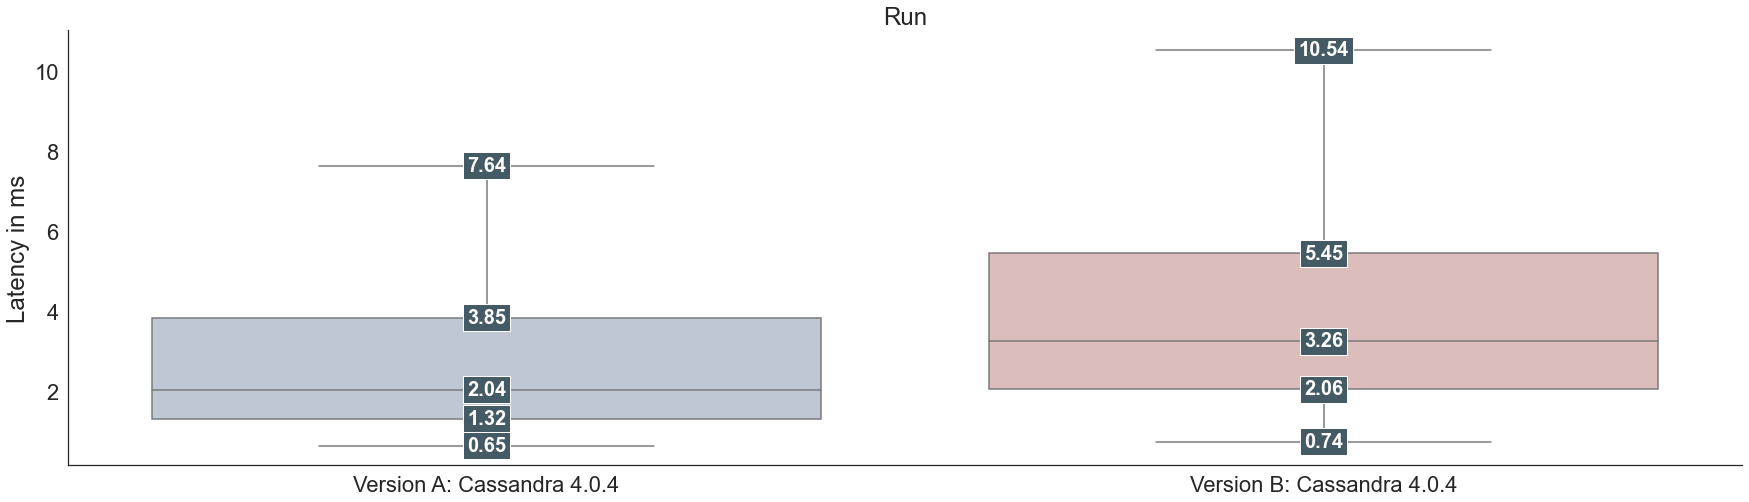

In [322]:

combined_dfs = pd.DataFrame({versionA: dfA['latency_ms'],
                             versionB: dfB['latency_ms']})
                             
sns.set_style('white')
sns.set_context('notebook', font_scale=2.0)

box_plot = sns.boxplot(data=combined_dfs, color='white', showfliers=False, whis=1.5,palette="vlag").set_title(phase)




ax = box_plot.axes
ax.set_ylabel("Latency in ms")
lines = ax.get_lines()

categories = ax.get_xticks()

for i in range(0,5):
    for cat in categories:

        y = round(lines[(i+cat*5)].get_ydata()[0],2) 

        ax.text(
            cat, 
            y, 
            f'{y}', 
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=20,
            color='white',
            bbox=dict(facecolor='#445A64'))


sns.despine()



### Create Flowchart

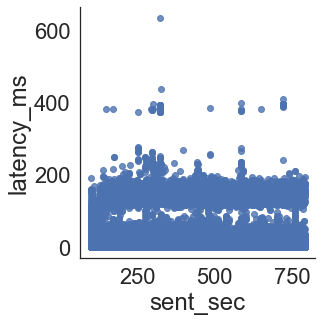

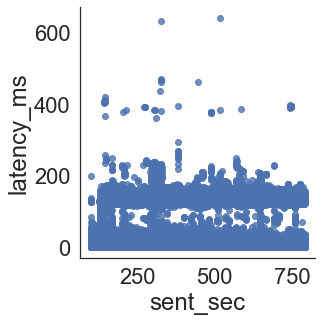

In [323]:
plot = sns.lmplot(x='sent_sec', y='latency_ms', data=dfA, fit_reg=False)
plot = sns.lmplot(x='sent_sec', y='latency_ms', data=dfB, fit_reg=False)

<AxesSubplot:xlabel='sent_sec'>

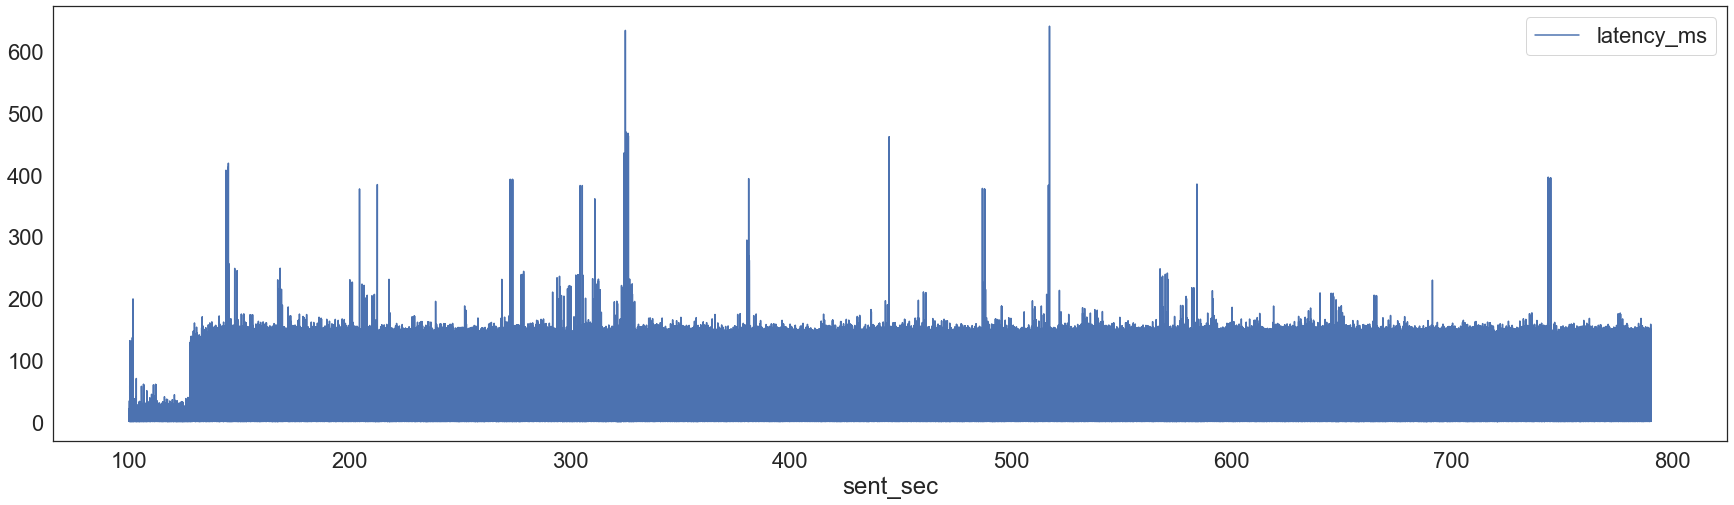

In [324]:
dfB.plot.line(x='sent_sec', y='latency_ms')

<AxesSubplot:xlabel='sent_sec', ylabel='latency_ms'>

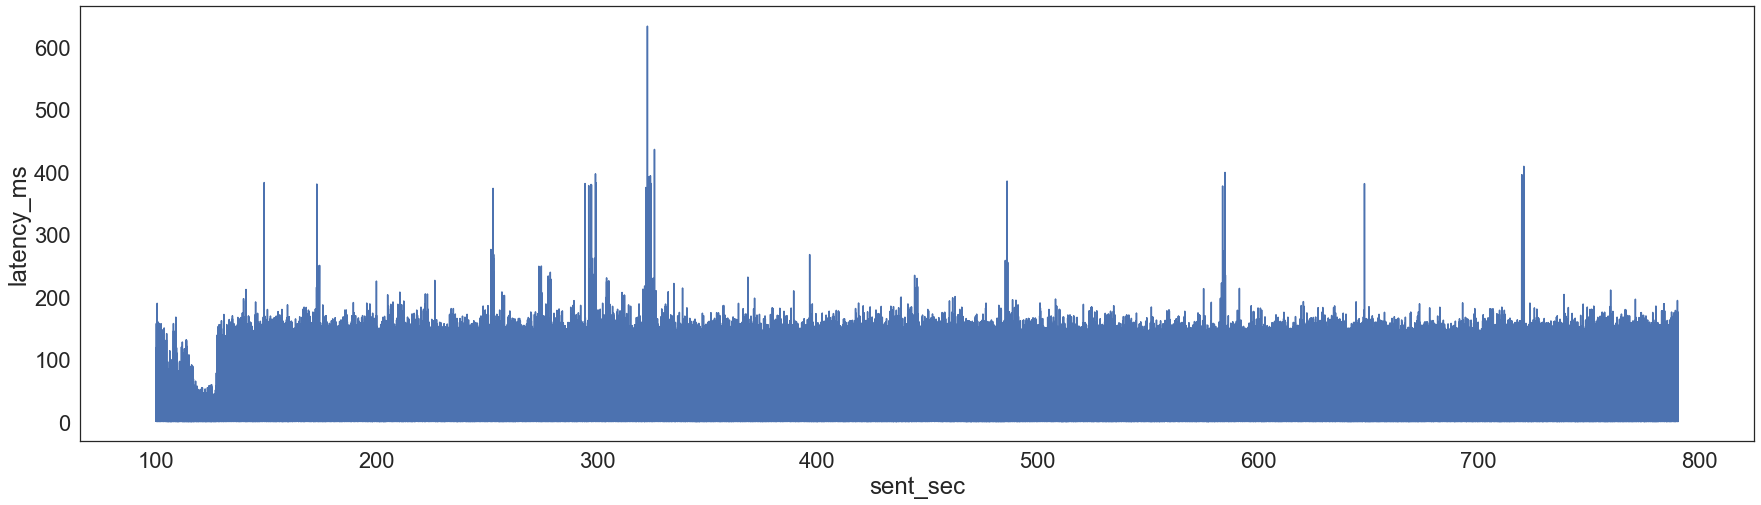

In [325]:
sns.lineplot(data=dfA, x="sent_sec", y="latency_ms")


In [326]:
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(30,8)})
print(len(df))

2500000


### Create Linechart comparing latencies of Version A and B

C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_18784\1174299737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartA["100sec_average"] = subchartA.latency_ms.rolling(200).mean().shift(-50)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_18784\1174299737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartB["100sec_average"] = subchartB.latency_ms.rolling(200).mean().shift(-50)


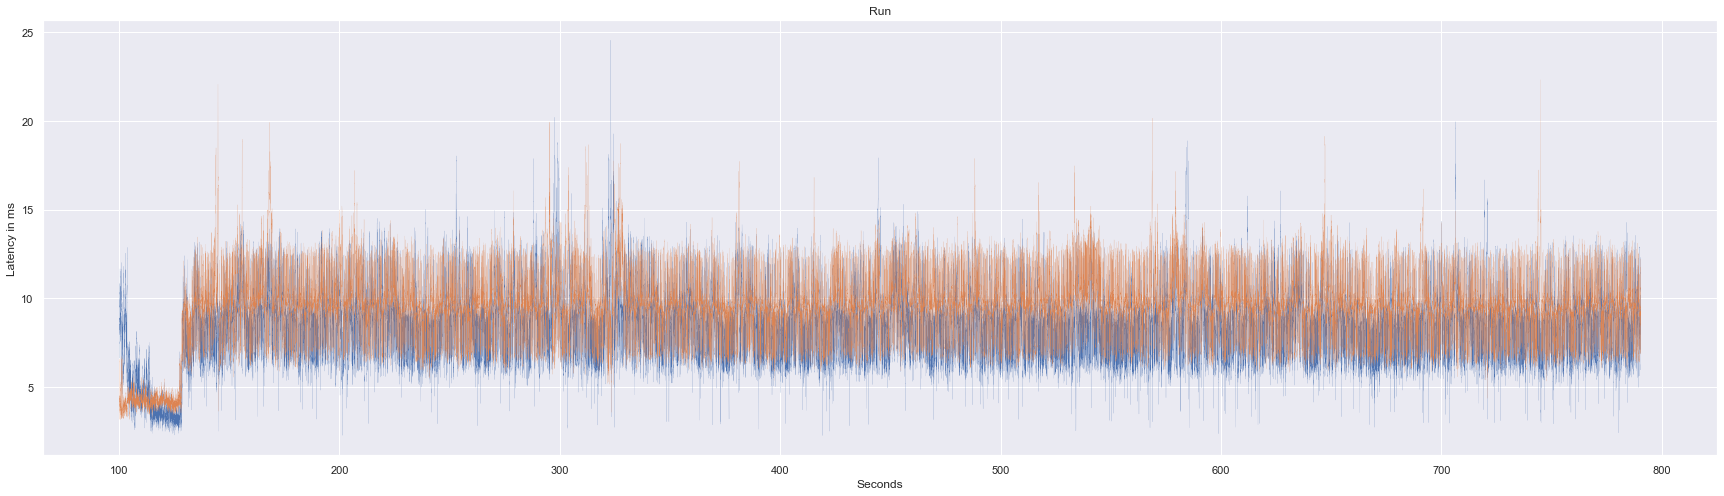

In [327]:
subchartA = dfA[['sent_sec', 'latency_ms']]
subchartB = dfB[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(200).mean().shift(-50)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(200).mean().shift(-50)

p = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.1)
sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.1).set_title(phase)
p.set_xlabel("Seconds");
p.set_ylabel("Latency in ms");
